# Function Transform

(i) Log Transform is used when the data is right skewed distributed data

(ii) Recipocal Transform 

(iii) Square Transform is used when the data is left skewed distributed data

(iv) Square root

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
data.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [3]:
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
# Filling Missing Values
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [5]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x=data.iloc[:,1:3]
y=data.iloc[:,0]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [9]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

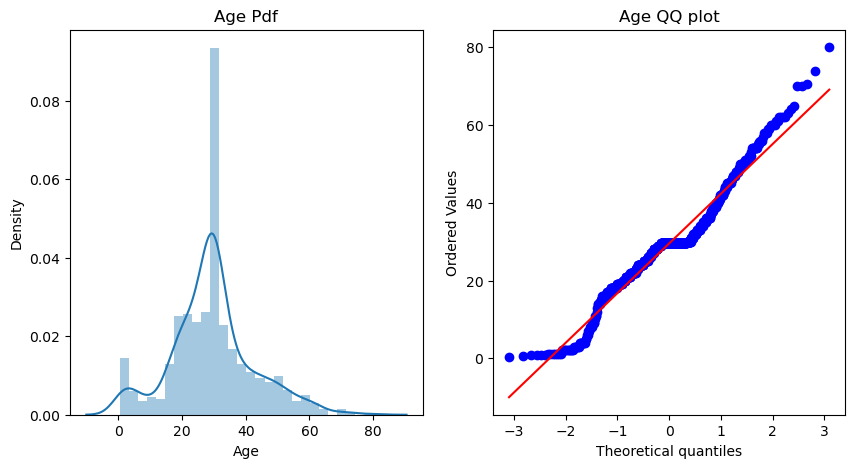

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

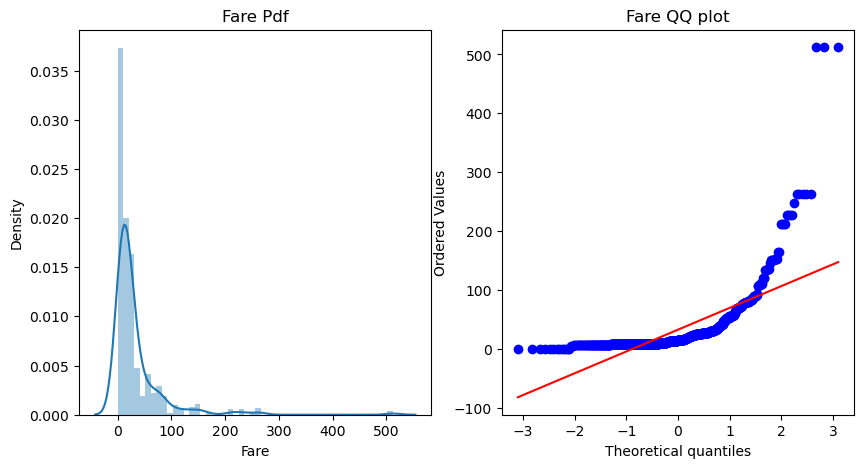

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare Pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [12]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()

In [13]:
lr.fit(x_train,y_train)
dtc.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_pred_1=dtc.predict(x_test)

print("Accuracy Score of LR",accuracy_score(y_test,y_pred))
print("Accuracy Score of DTC",accuracy_score(y_test,y_pred_1))

Accuracy Score of LR 0.6480446927374302
Accuracy Score of DTC 0.6759776536312849


In [14]:
# Funcion Transformer
ft=FunctionTransformer(func=np.log1p)

log1p: it is used generally used and one advantages is that if the value is zero it adds first one to zero and then find log of the data

In [16]:
x_train_transformed=ft.fit_transform(x_train)
x_test_transformed=ft.transform(x_test)

In [19]:
lr.fit(x_train_transformed,y_train)
dtc.fit(x_train_transformed,y_train)

y_pred=lr.predict(x_test_transformed)
y_pred_1=dtc.predict(x_test_transformed)

print("Accuracy Score of LR",accuracy_score(y_test,y_pred))
print("Accuracy Score of DTC",accuracy_score(y_test,y_pred_1))

Accuracy Score of LR 0.6815642458100558
Accuracy Score of DTC 0.6815642458100558


In [21]:
x_transformed=ft.fit_transform(x)
print("LR",np.mean(cross_val_score(lr,x_transformed,y,scoring='accuracy',cv=10)))
print("DTC",np.mean(cross_val_score(dtc,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DTC 0.6577403245942571


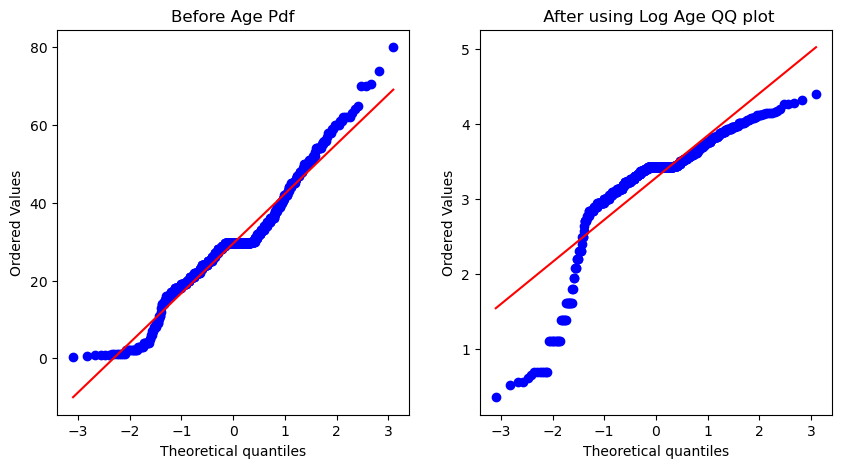

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Before Age Pdf')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title(' After using Log Age QQ plot')
plt.show()

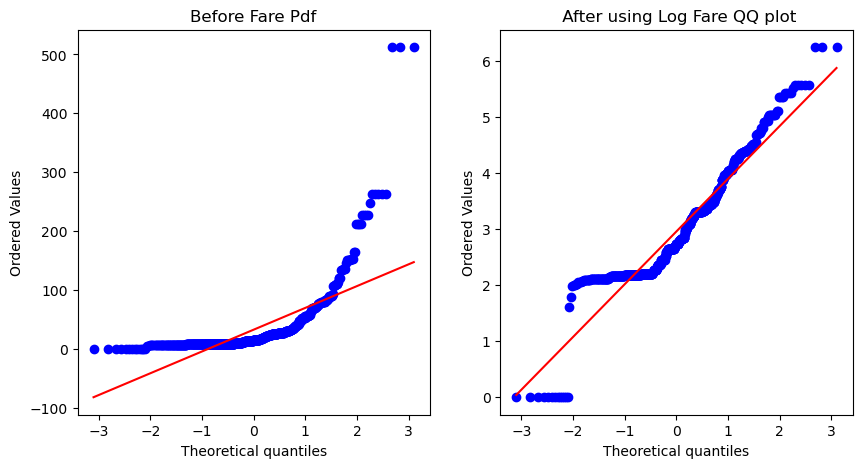

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Before Fare Pdf')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title(' After using Log Fare QQ plot')
plt.show()

As seen in above figure, before and after fig of age and fare. Age wasn't required log transform so now, i am doing log transform only on fare column for good accuracy

In [26]:
trf2= ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
x_train_transformed_again=trf2.fit_transform(x_train)
x_test_transformed_again=trf2.transform(x_test)

In [27]:
lr.fit(x_train_transformed_again,y_train)
dtc.fit(x_train_transformed_again,y_train)

y_pred=lr.predict(x_test_transformed_again)
y_pred_1=dtc.predict(x_test_transformed_again)

print("Accuracy Score of LR",accuracy_score(y_test,y_pred))
print("Accuracy Score of DTC",accuracy_score(y_test,y_pred_1))

Accuracy Score of LR 0.6703910614525139
Accuracy Score of DTC 0.6536312849162011


In [29]:
x_transformed_again=ft.fit_transform(x)
print("LR",np.mean(cross_val_score(lr,x_transformed_again,y,scoring='accuracy',cv=10)))
print("DTC",np.mean(cross_val_score(dtc,x_transformed_again,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DTC 0.6611111111111111


In [43]:
def apply_transform(transform):
    x=data.iloc[:,1:3]
    y=data.iloc[:,0]
    trf= ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans=trf.fit_transform(x)
    lr=LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(lr,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('Fare before transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare after Transform')
    plt.show()

Accuracy 0.6195131086142323


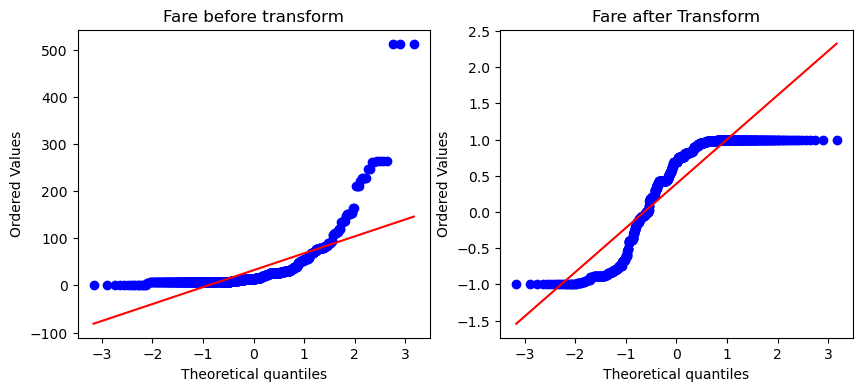

In [51]:
apply_transform(np.sin)